In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

# Creating the dataframe
data = {
    'type': ['Basic Human Needs', 'Basic Human Needs', 'Basic Human Needs', 'Basic Human Needs', 'Basic Human Needs', 
             'Basic Human Needs', 'Basic Human Needs', 'ChildCare', 'work', 'work', 'work'],
    'activities': ['sleep', 'clean/shower/pee', 'Eat', 'clean the house', 'Errands', 'Exercise', 'Misc', 
                   'Taking Care of Kids', 'work', 'commute', 'misc'],
    'hours_per_day': [8, 1, 1.5, 0.5, 0.5, 0.5, 1, 1, 8.5, 2, 0.5],
    'hours_per_year': [2920, 900, 547.5, 182.5, 182.5, 182.5, 365, 365, 2080, 730, 120]
}

df = pd.DataFrame(data)

In [5]:
df

,type,activities,hours_per_day,hours_per_year
0,Basic Human Needs,sleep,8.0,2920.0
1,Basic Human Needs,clean/shower/pee,1.0,900.0
2,Basic Human Needs,Eat,1.5,547.5
3,Basic Human Needs,clean the house,0.5,182.5
4,Basic Human Needs,Errands,0.5,182.5
...,...,...,...,...
6,Basic Human Needs,Misc,1.0,365.0
7,ChildCare,Taking Care of Kids,1.0,365.0
8,work,work,8.5,2080.0
9,work,commute,2.0,730.0


In [110]:
df_pivot = df.pivot_table(index='type', columns='activities', values='hours_per_year', fill_value=0)

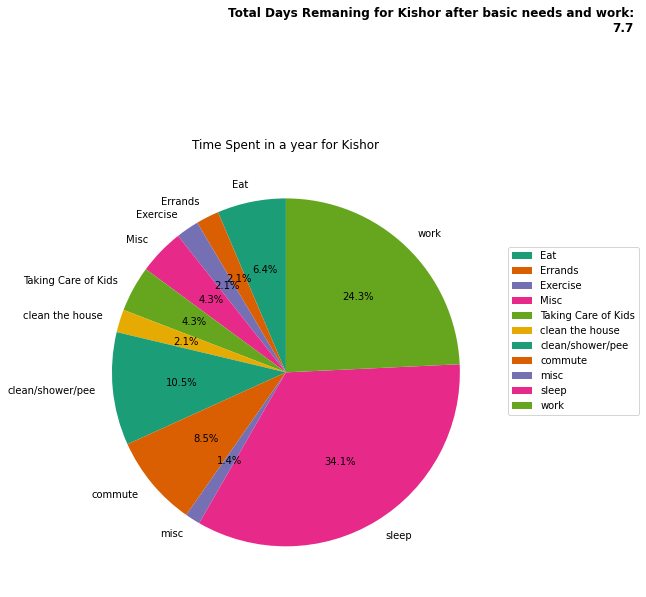

In [ ]:
# Adding a column for remaining hours 
df_pivot['Remaining Hours'] = 8760 - df_pivot.sum(axis=1)

# Dropping the 'Remaining Hours' column
df_pivot = df_pivot.drop('Remaining Hours', axis=1)

# Creating the pie chart
colors = plt.cm.Dark2(range(6))
fig, ax = plt.subplots(figsize=(8, 8))
df_pivot.sum().plot(kind='pie', ax=ax, colors=colors, autopct='%1.1f%%', startangle=90)
ax.set_ylabel('')
ax.set_title('Time Spent in a year for Kishor')
plt.legend(df_pivot.columns, loc='upper left', bbox_to_anchor=(1, 0.8))

# Adding the total hours as text in the center of the pie chart
total_hours = df_pivot.sum().sum()
Remaining_days = (8760 - (df_pivot.sum().sum()))/24
# ax.text(1.2, 3, f'Total Hours Spent in a year:\n{total_hours:.1f}', ha='right', va='top', fontsize=14, fontweight='bold')
ax.text(2, 2.1, f'Total Days Remaining for Kishor after basic needs and work:\n{Remaining_days:.1f}', ha='right', va='top', fontsize=12, fontweight='bold')

plt.show()